# Snake Classifier

Can classify 13 different types od snakes
The types are following:
1. Python
2. Rattle
3. Cobra
4. Anaconda
5. Black Mamba
6. King Cobra
7. Coral Snake
8. Water Snake
9. Sea Snake
10. Bushmaster
11. Rat Snake
12. Parot Snake
13. Lora

In [19]:
!pip install -Uqq fastai gradio nbdev

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
%cd /content/drive/My Drive/DataScience/Image_Recognizer/

/content/drive/My Drive/DataScience/Image_Recognizer


In [22]:
from fastai.vision.all import *

In [23]:
from fastai.vision.all import load_learner
import gradio as gr

In [25]:
model = load_learner(f'models/snake-recognizer-v1.pkl')

In [31]:
snake_labels = {
    "Python",
    "Rattle",
    "Cobra",
    "Anaconda",
    "Black Mamba",
    "King Cobra",
    "Coral Snake",
    "Water Snake",
    "Sea Snake",
    "Bushmaster",
    "Rat Snake",
    "Parot Snake",
    "Lora"


}

def recognize_image(image):
  pred, idx, probs = model.predict(image)
  print(pred, idx, probs)
  return dict(zip(snake_labels, map(float, probs)))

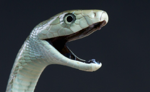

In [32]:
from PIL import Image
img = Image.open(f'test_images/test_image2.jpg')
img.to_thumb(150,150)

In [33]:
recognize_image(img)

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


Black Mamba tensor(1) tensor([9.9874e-05, 9.9946e-01, 1.8821e-05, 1.1343e-06, 2.2595e-04, 1.8724e-04,
        8.0084e-06])


{'Parot Snake': 9.987394150812179e-05,
 'Cobra': 0.9994589686393738,
 'Python': 1.882092510641087e-05,
 'King Cobra': 1.1342710877215723e-06,
 'Rattle': 0.0002259531174786389,
 'Coral Snake': 0.00018724455730989575,
 'Rat Snake': 8.008356417121831e-06}

In [34]:
image = gr.Image()
label = gr.Label()
examples = [

    'test_images/test_image1.jpg',
    'test_images/test_image2.jpg',
    'test_images/test_image3.jpg',
    'test_images/test_image4.jpg',
    'test_images/test_image5.jpg',

    ]
iface = gr.Interface(fn=recognize_image, inputs=image, outputs=label, examples=examples)
iface.launch(inline=False, share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://a1f901e27aa9317343.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# Notebook to Python Script

In [ ]:
from nbdev.export import notebook2script